In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from skimage.filters import sobel
from scipy import ndimage as ndi
from scipy.ndimage import binary_fill_holes 
from scipy.ndimage import gaussian_filter
from scipy.ndimage import distance_transform_edt
from sklearn.cluster import KMeans
from skimage import color
from skimage import data
from skimage import measure
from skimage.segmentation import watershed
from skimage import segmentation
from skimage import img_as_float
from skimage.feature import canny
from skimage.feature import peak_local_max
from skimage.morphology import reconstruction

ModuleNotFoundError: No module named 'skimage'

In [ ]:
# coins = data.coins()
wing_1 = cv2.imread('../testdata/set_1/043870_L_O.JPG')
wing_2 = cv2.imread('../testdata/set_1/043870_R_O.JPG')
wing_3 = cv2.imread('../testdata/set_1/043874_L_O.JPG')
wing_4 = cv2.imread('../testdata/set_1/043874_R_O.JPG')
wing_5 = cv2.imread('../testdata/set_1/043878_L_O.JPG')
wing_6 = cv2.imread('../testdata/set_1/043878_R_O.JPG')
wing_7 = cv2.imread('../testdata/set_1/043884_L_O.JPG')

wing = wing_2

In [ ]:
wing.shape

In [ ]:
gray = cv2.cvtColor(wing, cv2.COLOR_BGR2GRAY)

In [2]:
scale_percent = 0.20 
new_width = int(image.shape[1] * scale_percent)
new_height = int(image.shape[0] * scale_percent)
resized_wing = cv2.resize(gray, (new_width, new_height))
plt.imshow(resized_wing, cmap='gray')
plt.colorbar()

NameError: name 'image' is not defined

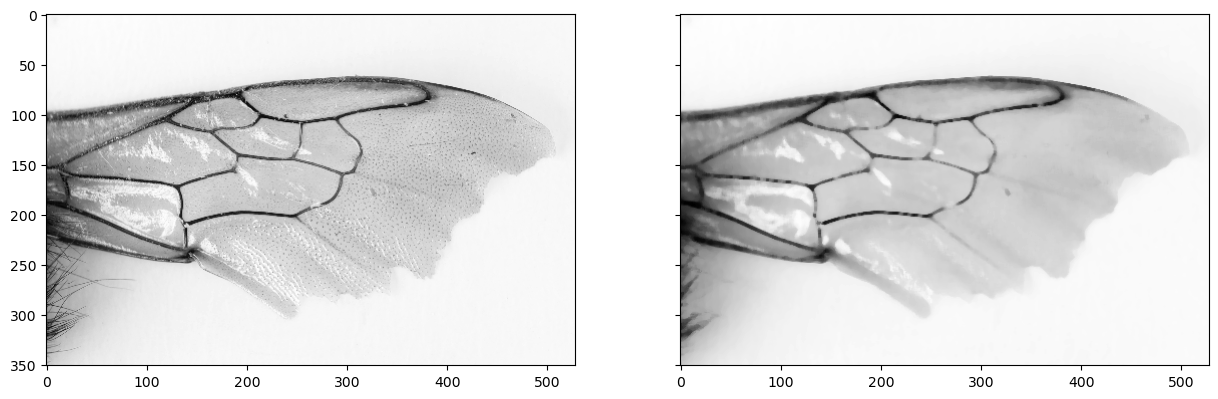

In [199]:
# wing_denoised = cv2.GaussianBlur(resized_wing, (5, 5), 0)
wing_denoised = cv2.medianBlur(resized_wing, 5)

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), sharex=True, sharey=True)
ax0.imshow(resized_wing, cmap='gray')
ax1.imshow(wing_denoised, cmap='gray')

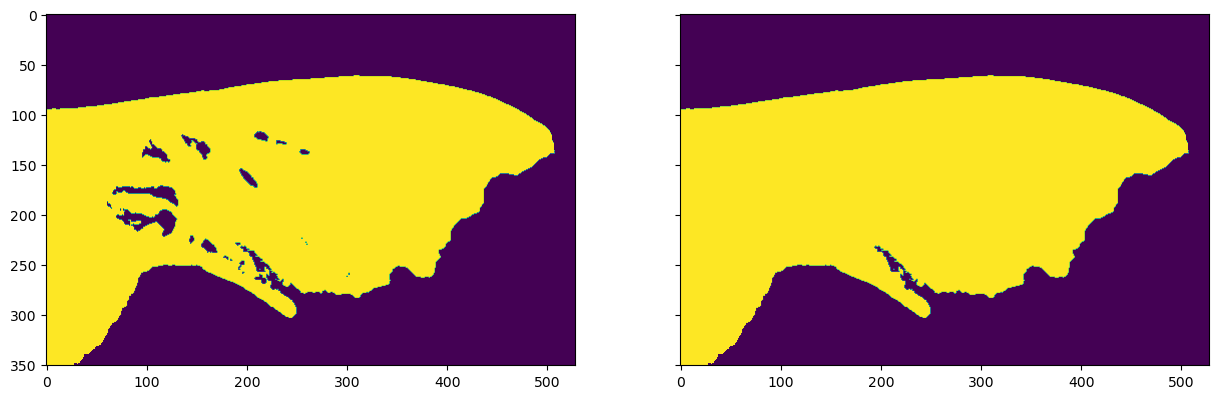

In [200]:
mask = wing_denoised < 230
filled_mask = binary_fill_holes(mask)

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), sharex=True, sharey=True)
ax0.imshow(mask)
ax1.imshow(filled_mask)

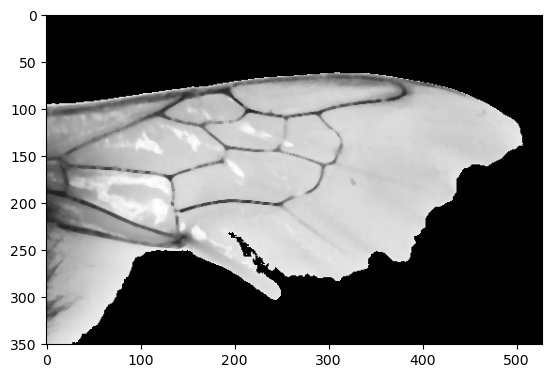

In [201]:
new_image = filled_mask * wing_denoised
plt.imshow(new_image, cmap='gray')

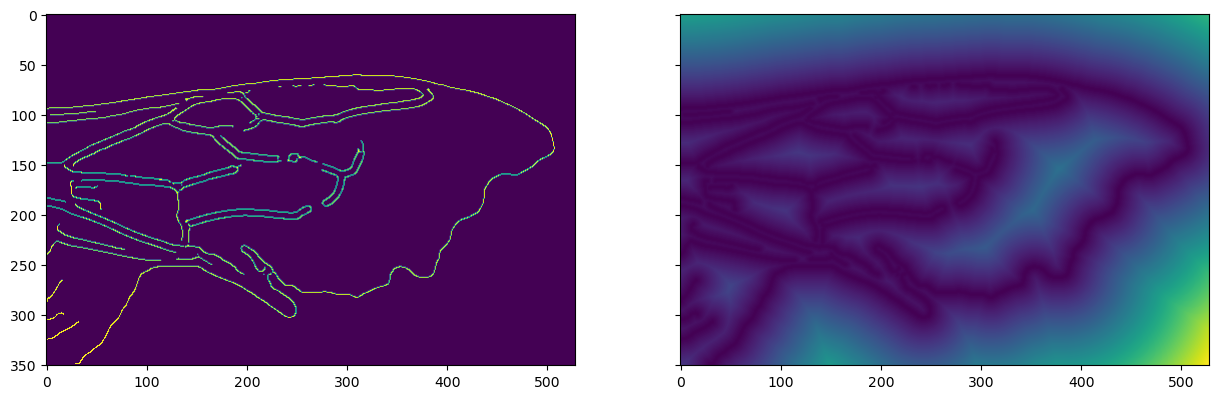

In [202]:
edges = canny(new_image, sigma=3)
dt = distance_transform_edt(~edges)

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), sharex=True, sharey=True)
ax0.imshow(edges)
ax1.imshow(dt)

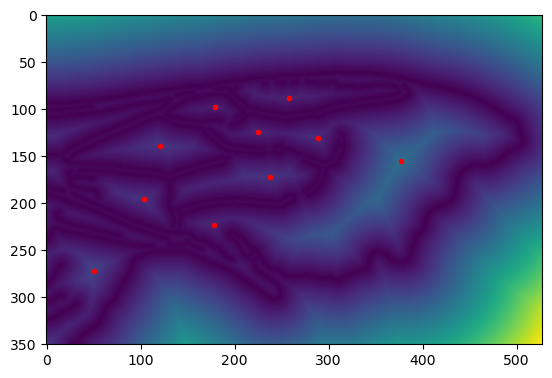

In [203]:
local_max = peak_local_max(dt, min_distance=30)

plt.imshow(dt, cmap='viridis')
plt.plot(local_max[:, 1], local_max[:, 0], 'r.')

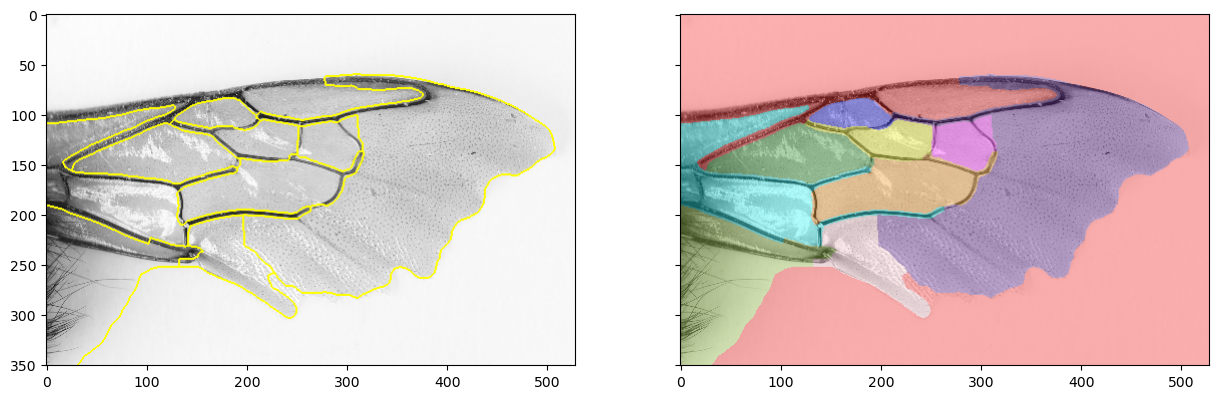

In [204]:
mask = np.zeros(dt.shape, dtype=bool)
mask[tuple(local_max.T)] = True
markers, _ = ndi.label(mask)
labels = watershed(-dt, markers)

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), sharex=True, sharey=True)
ax0.imshow(segmentation.mark_boundaries(resized_wing, labels))
ax1.imshow(color.label2rgb(labels, image=resized_wing))

In [205]:
segs, counts = np.unique(labels, return_counts=True)
segment_sizes = dict(zip(segs, counts))
for label, size in segment_sizes.items():
    print(f"Size of label {label}:\t{size} pixels")

Size of label 1:	101817 pixels
Size of label 2:	1793 pixels
Size of label 3:	2923 pixels
Size of label 4:	2564 pixels
Size of label 5:	5840 pixels
Size of label 6:	34944 pixels
Size of label 7:	7241 pixels
Size of label 8:	11175 pixels
Size of label 9:	4646 pixels
Size of label 10:	12385 pixels
